# What leads to divorce?

### Table of Contents

* **[Overview](#Overview)**

* **[Data Exploration](#Data-Exploration)**  
    * [Check for Data Quality](#Check-for-Data-Quality)
        * [Missing Values Check](#Missing-Values-Check)
        * [Zero Values Check](#Zero-Values-Check)
        * [Unique Values Check](#Unique-Values-Check)
        * [Duplicate Values Check](#Duplicate-Values-Check)
        * [Outlier Values Check](#Outlier-Values-Check)
* **[Data Visualization & Analysis](#Data-Visualization-&-Analysis)**
    * [Visualizing Outliers](#Visualizing-Outliers)
    * [Visualizing Correlations of Features](#Visualizing-Correlations-of-Features)
* **[Data Preparation](#Data-Preparation)**
    * [Data Cleanup](#Data-Cleanup)
        * [Handling Missing Values](#Handling-Missing-Values)
        * [Handling Outliers](#Handling-Outliers)
* **[Feature Engineering](#Feature-Engineering)**
    * [Correlation Method](#Correlation-Method)
    * [Random Forest Classifier Method](#Random-Forest-Classifier-Method)
* **[Modeling](#Modeling)**
    * [Classification Models](#Classification-Models)
    * [Cross Validation](#Cross-Validation)
    * [Grid Search Hyper Parameters Tuning](#Grid-Search-Hyper-Parameters-Tuning)
* **[Ensemble Techniques](#Ensemble-Techniques)**
    * [Ensemble Classifiers](#Ensemble-Classifiers)
* **[Deep Learning](#Deep-Learning)**
    * [Sequential](#Sequential)
    * [LSTM and Dense](#LSTM-and-Dense)
       

# Overview


<p>This the dataset that was collected from <a href='kaggle.com'>Kaggle</a> from the the below url.</p>
<p><a href='https://www.kaggle.com/datasets/andrewmvd/divorce-prediction'>Divorce Prediction Dataset</a></p>
<p>The dataset contains actual data which has been masked for privacy on the given features and reference has the explanation for each feature. No personal information is revealed in the data.</p>
<p>This analysis is going to predict the factors that are contributing to the divorce.</p>

In [1]:
import math
import time
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingRegressor, VotingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import tensorflow as tf
from tensorflow.keras.utils import plot_model




# Data Exploration

In [2]:
# Set all columns visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Load reference data into dataframe
datareference = pd.read_csv('data/divorce-dataset-1/reference.tsv', sep = '|')

This dataset contains data about 170 couples with their corresponding Divorce Predictors Scale variables (DPS) on the basis of Gottman couples therapy for 54 questions.
The couples are from various regions of Turkey wherein the records were acquired from face-to-face interviews from couples who were already divorced or happily married.
All responses were collected on a 5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always).

Source: <a href='https://www.kaggle.com/datasets/andrewmvd/divorce-prediction'>https://www.kaggle.com/datasets/andrewmvd/divorce-prediction</a>

In [4]:
# Read reference data & Aligned dataframe columns and headers
left_aligned_refdata = datareference.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
left_aligned_refdata

,atribute_id,description
0,1,"If one of us apologizes when our discussion deteriorates, the discussion ends."
1,2,"I know we can ignore our differences, even if things get hard sometimes."
2,3,"When we need it, we can take our discussions with my spouse from the beginning and correct it."
3,4,"When I discuss with my spouse, to contact him will eventually work."
4,5,The time I spent with my wife is special for us.
5,6,We don't have time at home as partners.
6,7,We are like two strangers who share the same environment at home rather than family.
7,8,I enjoy our holidays with my wife.
8,9,I enjoy traveling with my wife.
9,10,Most of our goals are common to my spouse.


In [5]:
# read feature data
data = pd.read_csv('data/divorce-dataset-1/divorce_data.csv', sep = ';')

In [6]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


# Check for Data Quality

Checking for all data quality issues in the dataset.
        

## Missing Values Check

Checking for missing values in the data set.

In [7]:
# Missing values check
missing_values_count = data.isna().sum()
print(missing_values_count)

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64


## Zero Values Check

Checking for zero values in the data set.


In [8]:
# Zero values check
data.eq(0).sum()

Q1          69
Q2          59
Q3          51
Q4          75
Q5          82
Q6          86
Q7         114
Q8          81
Q9          84
Q10         62
Q11         71
Q12         58
Q13         47
Q14         66
Q15         69
Q16         75
Q17         73
Q18         79
Q19         77
Q20         81
Q21         78
Q22         87
Q23         90
Q24         72
Q25         63
Q26         72
Q27         77
Q28         85
Q29         81
Q30         72
Q31         44
Q32         46
Q33         71
Q34         50
Q35         85
Q36         88
Q37         49
Q38         64
Q39         50
Q40         72
Q41         55
Q42         44
Q43         16
Q44         60
Q45         28
Q46         22
Q47         33
Q48         10
Q49         28
Q50         19
Q51         12
Q52         23
Q53         31
Q54         50
Divorce     86
dtype: int64

## Unique Values Check

Checking for unique values in the data set.
        

In [9]:
# Unique values check
def unique_values_and_null_percentage(dataframe):
    """
    Check the count of unique values and the percentage of null values for each column in a DataFrame.

    Parameters:
    - dataframe: Pandas DataFrame.

    Returns:
    - A DataFrame with column names, the count of unique values, and the percentage of null values.
    """
    unique_count = dataframe.nunique()
    null_percentage = dataframe.isnull().mean() * 100

    result_df = pd.DataFrame({
        'Column': unique_count.index,
        'Unique Count': unique_count.values,
        'Null Percentage': null_percentage.values
    })

    result_df = result_df.sort_values(by='Unique Count', ascending=False).reset_index(drop=True)
    return result_df[['Column', 'Unique Count', 'Null Percentage']]

result = unique_values_and_null_percentage(data)
print(result)

     Column  Unique Count  Null Percentage
0        Q1             5              0.0
1       Q42             5              0.0
2       Q31             5              0.0
3       Q32             5              0.0
4       Q33             5              0.0
5       Q34             5              0.0
6       Q35             5              0.0
7       Q36             5              0.0
8       Q37             5              0.0
9       Q38             5              0.0
10      Q39             5              0.0
11      Q40             5              0.0
12      Q41             5              0.0
13      Q43             5              0.0
14      Q29             5              0.0
15      Q44             5              0.0
16      Q45             5              0.0
17      Q46             5              0.0
18      Q47             5              0.0
19      Q48             5              0.0
20      Q49             5              0.0
21      Q50             5              0.0
22      Q51

## Duplicate Values Check

Checking for duplicate values in the data set.

In [10]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")



Number of duplicate rows: 20


## Outlier Values Check

In [11]:
def check_outliers(dataframe, threshold=1.5):
    """
    Check for outliers in a DataFrame using the interquartile range (IQR) method.

    Parameters:
    - dataframe: Pandas DataFrame.
    - threshold: Multiplier for the IQR to determine the outlier threshold. Default is 1.5.

    Returns:
    - A DataFrame containing columns, their corresponding outlier count, and a boolean flag
      indicating whether the column has outliers.
    """
    outlier_info = []

    for column in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            # Calculate IQR for the column
            Q1 = dataframe[column].quantile(0.25)
            Q3 = dataframe[column].quantile(0.75)
            IQR = Q3 - Q1

            # Identify outliers using the IQR method
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
            outlier_count = len(outliers)

            # Append information to the result list
            outlier_info.append({
                'Column': column,
                'Outlier Count': outlier_count,
                'Has Outliers': outlier_count > 0
            })

    result_df = pd.DataFrame(outlier_info)
    return result_df

check_outliers(data)

,Column,Outlier Count,Has Outliers
0,Q1,0,False
1,Q2,0,False
2,Q3,0,False
3,Q4,0,False
4,Q5,0,False
5,Q6,6,True
6,Q7,9,True
7,Q8,0,False
8,Q9,0,False
9,Q10,0,False


# Data Visualization & Analysis

## Visualizing Outliers
   

<Axes: ylabel='Count'>

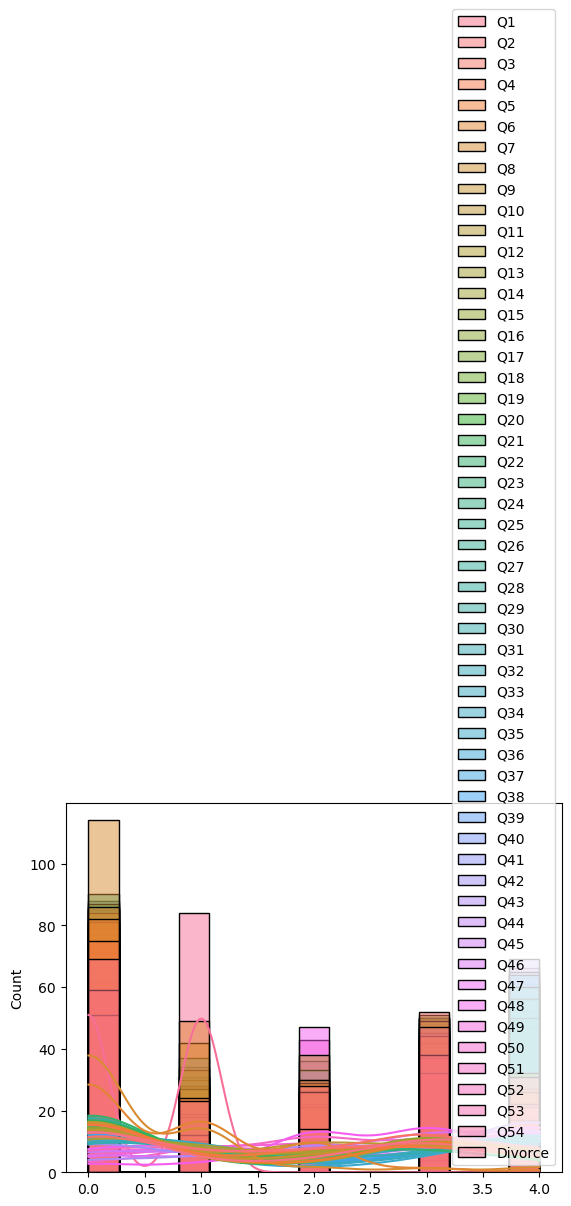

In [12]:
sns.histplot(data=data, kde=True)

## Visualizing Correlations of Features

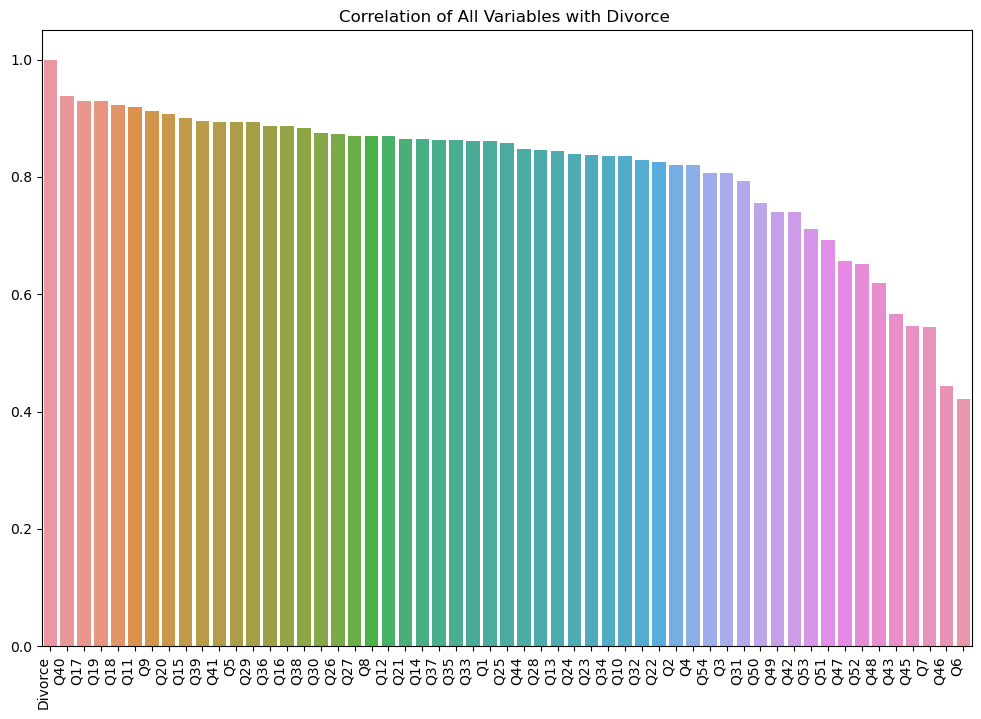

In [13]:
# Correlation of All Variables with Divorce
correlation_with_divorce = data.corrwith(data['Divorce']).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_divorce.index, y=correlation_with_divorce.values)
plt.xticks( rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.title('Correlation of All Variables with Divorce ')
plt.show()


# Data Preparation

## Data Cleanup

There are no nulls.There are 5 unique values in each column except the output column, they are fine per input data. Zero is valid input, and no need to handle that. 
There are 20 duplicates, removing them.



In [14]:
# Drop duplicates
data_no_duplicates = data.drop_duplicates()
data_no_duplicates.reset_index(drop=True)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
147,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


## Handling Missing Values
No missing values. Data is clean

## Handling Outliers
There are 7 outliers,dropped them.

In [15]:
z_scores = np.abs(stats.zscore(data_no_duplicates))

# Define a threshold for Z-score (e.g., 3 standard deviations)
threshold = 3

# Remove rows with outliers
data_no_outliers = data_no_duplicates[(z_scores < threshold).all(axis=1)]
    
data_no_outliers

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


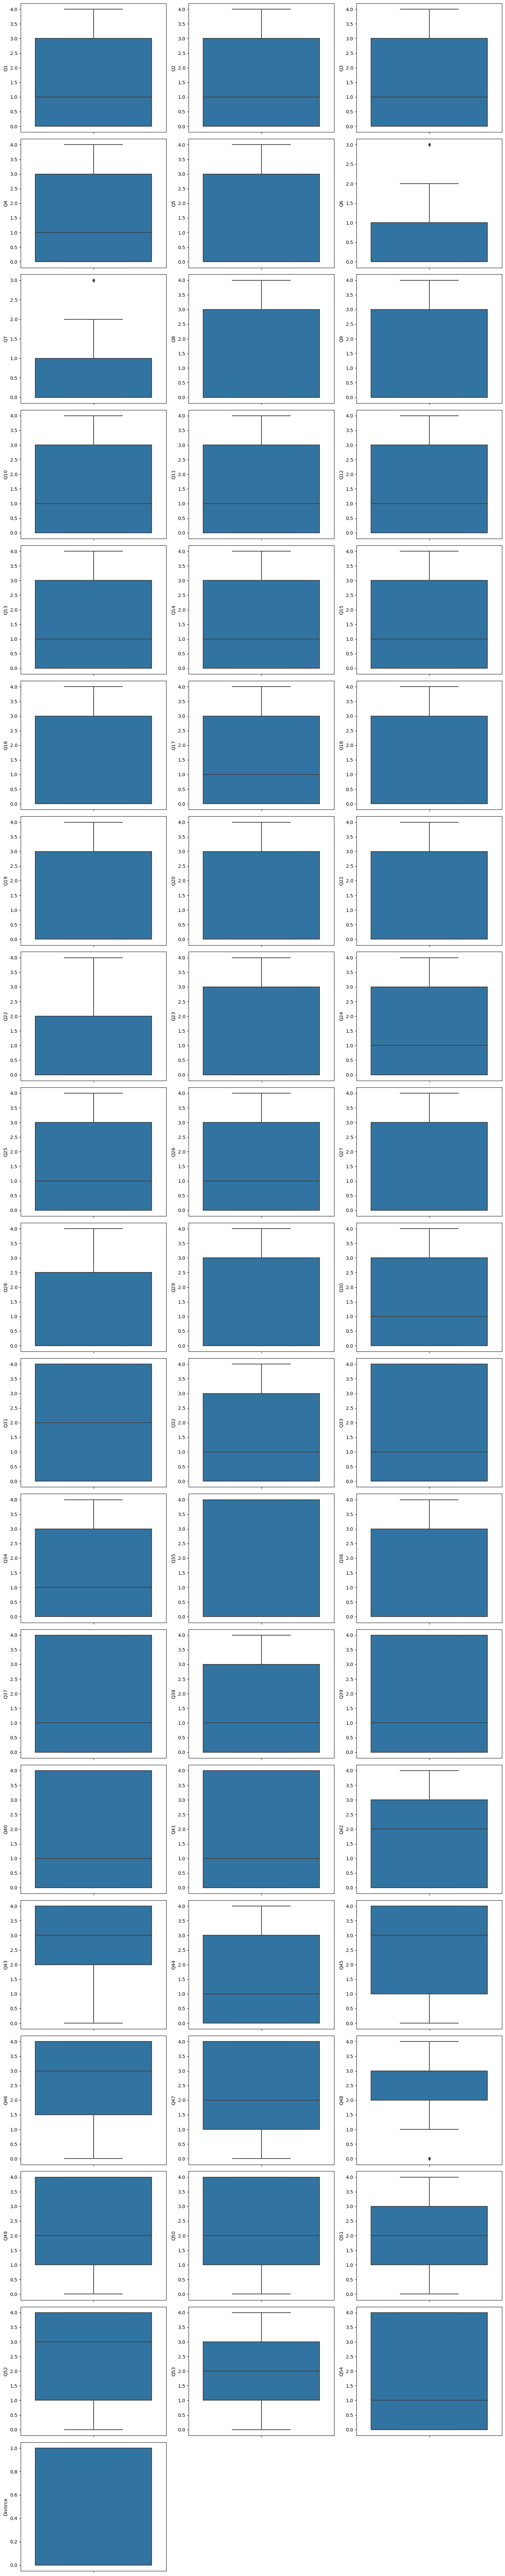

In [16]:
# Visualizing no outliers
num_cols = len(data_no_outliers.columns)

# Create subplots with three columns
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Iterate through columns and create box plots
for i, column in enumerate(data_no_outliers.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data=data_no_outliers, y=column, ax=axes[row, col], showfliers=True)  # Set showfliers=True to display outliers

# Remove any empty subplots if the number of columns is not a multiple of 3
if num_cols % 3 != 0:
    for i in range(num_cols % 3, 3):
        fig.delaxes(axes[row, i])

plt.tight_layout()
plt.show()

# Feature Engineering
   

In [17]:
# X, y split with target variable
X = data_no_outliers.drop('Divorce', axis=1)  # Features
y = data_no_outliers['Divorce']  # Target variable

## Correlation Method

In [18]:
#Calculate the correlation matrix and extract top 10 features
correlation_matrix = data_no_outliers.corr()


# Define your target variable (column name)
target_variable = 'Divorce'  # Replace 'Target' with your target variable name

# Calculate the absolute correlation values between the target variable and other features
correlation_with_target = abs(correlation_matrix[target_variable])

# Sort the correlations in descending order
sorted_correlations = correlation_with_target.sort_values(ascending=False)

# Specify the number of top features you want to extract
num_top_features =10  # Adjust this value as needed

# Extract the top features and their correlation values
top_features = sorted_correlations.index[1:num_top_features + 1]
top_correlation_values = sorted_correlations[1:num_top_features + 1]

# Create a DataFrame to display the top features and their correlation values
top_features_df = pd.DataFrame({'Feature': top_features, 'Correlation': top_correlation_values})

# Print the top features and their correlation values
print("Top Features with Correlation Values:")
print(top_features_df)

Top Features with Correlation Values:
    Feature  Correlation
Q40     Q40     0.948121
Q18     Q18     0.925469
Q17     Q17     0.920496
Q19     Q19     0.919653
Q11     Q11     0.911997
Q20     Q20     0.908882
Q5       Q5     0.904471
Q9       Q9     0.904398
Q36     Q36     0.901097
Q38     Q38     0.899337


## Random Forest Classifier Method

In [19]:
#Extract top 10 features using RandomForestClassifier

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Get the names of the features
feature_names = X.columns  # Assuming you're using a DataFrame

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df[:10]





# Print the sorted feature importances
print(X[top_10_features.Feature])

X_top10=X[top_10_features.Feature]




     Q18  Q40  Q11  Q17  Q20  Q19  Q28  Q26  Q36  Q14
0      0    3    1    0    1    0    0    0    1    1
1      4    4    4    4    2    3    0    1    2    0
2      3    3    3    3    2    3    2    2    1    3
3      3    4    4    3    4    3    1    1    1    4
4      1    1    0    1    1    2    2    2    0    1
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
165    0    0    0    0    0    0    0    0    0    0
166    0    1    0    0    0    0    0    0    1    0
167    0    2    0    0    1    0    0    1    0    0
168    0    1    0    0    0    0    0    0    0    0
169    0    0    0    0    1    0    0    0    0    1

[143 rows x 10 columns]


# Modeling


In [20]:
# Train/Test split with 20%

X_train, X_test, y_train, y_test = train_test_split(X_top10, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Classification Models


In [21]:
# Classification Models
logreg_model = LogisticRegression()
forest_model = RandomForestClassifier()
tree_model = DecisionTreeClassifier()
svc_model = SVC(kernel='linear',probability=True)  


# Train the models
logreg_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
svc_model.fit(X_train_scaled, y_train)



y_pred_logreg = logreg_model.predict(X_test)
y_pred_forest = forest_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test_scaled)


# Classification Metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_svc = accuracy_score(y_test, y_pred_svc)


print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print(f"Random Forest Accuracy: {accuracy_forest}")
print("Classification Report:")
print(classification_report(y_test, y_pred_forest))
print(f"Decision Tree Accuracy: {accuracy_tree}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))
print(f"SVC Accuracy: {accuracy_svc}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))


Logistic Regression Accuracy: 0.9655172413793104
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

Random Forest Accuracy: 0.9655172413793104
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

Decision Tree Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00     

## Cross Validation

In [22]:
# Define the models
classification_models = {
    'Logistic Regression Classification': logreg_model,
    'Random Forest Classification': forest_model,
    'Decision Tree Classification': tree_model,
    'SVC Classification': svc_model
}

# Cross-validation for classification models
classification_results = {'Model': [], 'Accuracy (Mean)': [], 'Accuracy (Std)': []}
for model_name, model in classification_models.items():
    if model_name!='SVC Classification':
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    else:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    classification_results['Model'].append(model_name)
    classification_results['Accuracy (Mean)'].append(scores.mean())
    classification_results['Accuracy (Std)'].append(scores.std())
    


# Create DataFrames
classification_results_df = pd.DataFrame(classification_results)

# Display results
print("\nClassification Results:")
print(classification_results_df)



Classification Results:
                                Model  Accuracy (Mean)  Accuracy (Std)
0  Logistic Regression Classification         0.982609        0.021300
1        Random Forest Classification         0.973913        0.034783
2        Decision Tree Classification         0.973913        0.034783
3                  SVC Classification         0.982609        0.021300


## Grid Search Hyper Parameters Tuning


In [23]:
# Define hyperparameter grids
param_grid_lrc = {'C': [0.001, 0.01, 0.1, 1, 10]}
param_grid_rfc = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}


# Perform Grid Search on classification
grid_search_logistic_reg_cls = GridSearchCV(logreg_model, param_grid_lrc, cv=5, scoring='accuracy')
grid_search_random_forest_cls = GridSearchCV(forest_model, param_grid_rfc, cv=5, scoring='accuracy')
grid_search_decision_tree_cls = GridSearchCV(tree_model, param_grid_dtc, cv=5, scoring='accuracy')
grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy')


# Fit the models
grid_search_logistic_reg_cls.fit(X_train, y_train)
grid_search_random_forest_cls.fit(X_train, y_train)
grid_search_decision_tree_cls.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)

# Get best hyperparameters

best_params_logistic_reg_cls = grid_search_logistic_reg_cls.best_params_
best_params_random_forest_cls = grid_search_random_forest_cls.best_params_
best_params_dt_cls = grid_search_decision_tree_cls.best_params_
best_params_random_svc_cls = grid_search_svc.best_params_

print(f'Best Hyperparameters (Logistic Regression): {best_params_logistic_reg_cls}')
print(f'Best Hyperparameters (Random Forest Classification): {best_params_random_forest_cls}')
print(f'Best Hyperparameters (Decision Tree Classification): {best_params_dt_cls}')
print(f'Best Hyperparameters (SVC Classification): {best_params_random_svc_cls}')


Best Hyperparameters (Logistic Regression): {'C': 1}
Best Hyperparameters (Random Forest Classification): {'max_depth': None, 'n_estimators': 50}
Best Hyperparameters (Decision Tree Classification): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Hyperparameters (SVC Classification): {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


# Ensemble Techniques

## Ensemble Classifiers

In [24]:
#Create an ensemble using VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[
        ('Logistic Regression Classification', logreg_model),
        ('Random Forest Classification', forest_model),
        ('Decision Tree Classification', tree_model),
        ('SVC Classification', svc_model)
    ],
    voting='soft'  # 'soft' for probability voting, 'hard' for majority voting
)
# Fit the ensemble on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Multiple classifiers

classifiers = [logreg_model, forest_model, tree_model,svc_model]

# Evaluate each classifier
results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'Training Time (s)': []}

for classifier in classifiers:
    start_time = time.time()
    classifier.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    results['Classifier'].append(type(classifier).__name__)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['Training Time (s)'].append(training_time)


results_df = pd.DataFrame(results)
print(results_df)


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        12

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29


Confusion Matrix:
[[17  0]
 [ 1 11]]
               Classifier  Accuracy  Precision    Recall  Training Time (s)
0      LogisticRegression  0.965517   0.967433  0.965517           0.002027
1  RandomForestClassifier  0.965517   0.967433  0.965517           0.042244
2  DecisionTreeClassifier  1.000000   1.000000  1.000000           0.000637
3                     SVC  0.965517   0.967433  0.965517           0.000804


# Deep Learning

## Sequential

In [25]:
# Build a simple neural network model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (1 neuron)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions on the test data
y_pred = model.predict(X_test).flatten()

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

model.summary()


1/1 [==============================] - 0s 30ms/step
Mean Squared Error (MSE): 0.03
R-squared (R2): 0.89
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## LSTM and Dense

In [26]:

# Reshape data for LSTM input (samples, timesteps, features)
X_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_train, test_size=0.2, random_state=42)

# Build an LSTM model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(128, activation='relu'),  # First Dense layer with 128 neurons
    tf.keras.layers.Dense(64, activation='relu'),   # Second Dense layer with 64 neurons
    tf.keras.layers.Dense(1)  # Output layer for regression (1 neuron)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions on the test data
y_pred = model.predict(X_test).flatten()

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

model.summary()


1/1 [==============================] - 0s 57ms/step
Mean Squared Error (MSE): 0.00
R-squared (R2): 0.98
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense_3 (Dense)             (None, 128)               6528      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 27049 (105.66 KB)
Trainable params: 27049 (105.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
